Accuracy  : 0.8
Precision : 0.7874680306905372
Recall    : 0.7886261547588779
F1 Score  : 0.7866768370200865

Confusion Matrix:
 [[22  1  0]
 [ 1 12  6]
 [ 0  4 14]]

Classification Report:

              precision    recall  f1-score   support

      setosa       0.96      0.96      0.96        23
  versicolor       0.71      0.63      0.67        19
   virginica       0.70      0.78      0.74        18

    accuracy                           0.80        60
   macro avg       0.79      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60



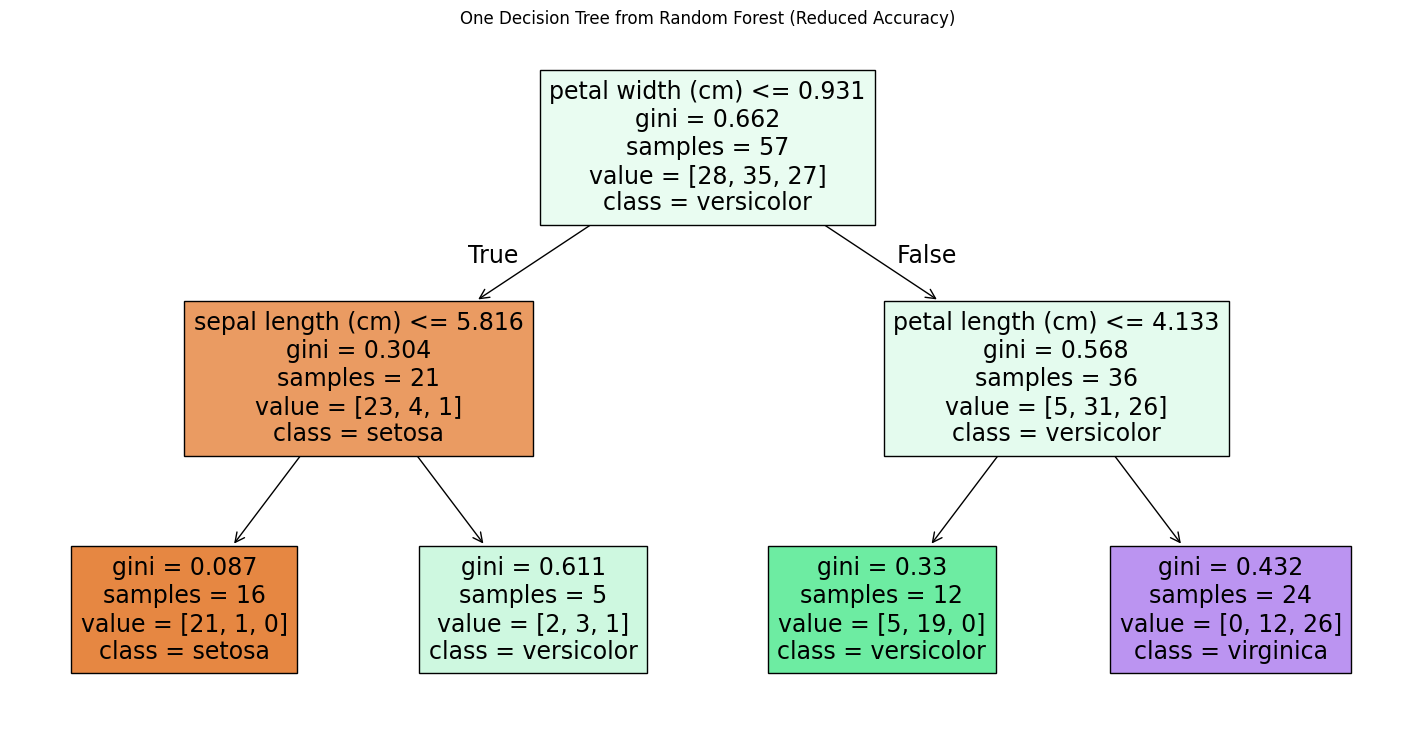

In [1]:

# 1. Import Required Libraries

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# 2. Load Iris Dataset

iris = load_iris()
X = iris.data
y = iris.target


# 3. Add Noise to Avoid 100% Accuracy

np.random.seed(42)
noise = np.random.normal(0, 0.8, X.shape)
X_noisy = X + noise


# 4. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_noisy, y, test_size=0.4, random_state=42
)

# 5. Train Random Forest Model (Controlled)

rf = RandomForestClassifier(
    n_estimators=5,     # fewer trees
    max_depth=2,        # shallow trees
    random_state=42
)

rf.fit(X_train, y_train)

# 6. Predictions

y_pred = rf.predict(X_test)

# 7. Evaluation Metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy  :", accuracy)
print("Precision :", precision)
print("Recall    :", recall)
print("F1 Score  :", f1)

print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 8. Visualize ONE Tree from Random Forest

plt.figure(figsize=(18, 9))
plot_tree(
    rf.estimators_[0],          # first tree in forest
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)
plt.title("One Decision Tree from Random Forest (Reduced Accuracy)")
plt.show()


Dataset shape: (569, 30)
Classes: ['malignant' 'benign']

Accuracy  : 0.9649122807017544
Precision : 0.9636363636363636
Recall    : 0.9814814814814815
F1 Score  : 0.9724770642201835

Confusion Matrix:
 [[ 59   4]
 [  2 106]]

Classification Report:

              precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        63
      benign       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



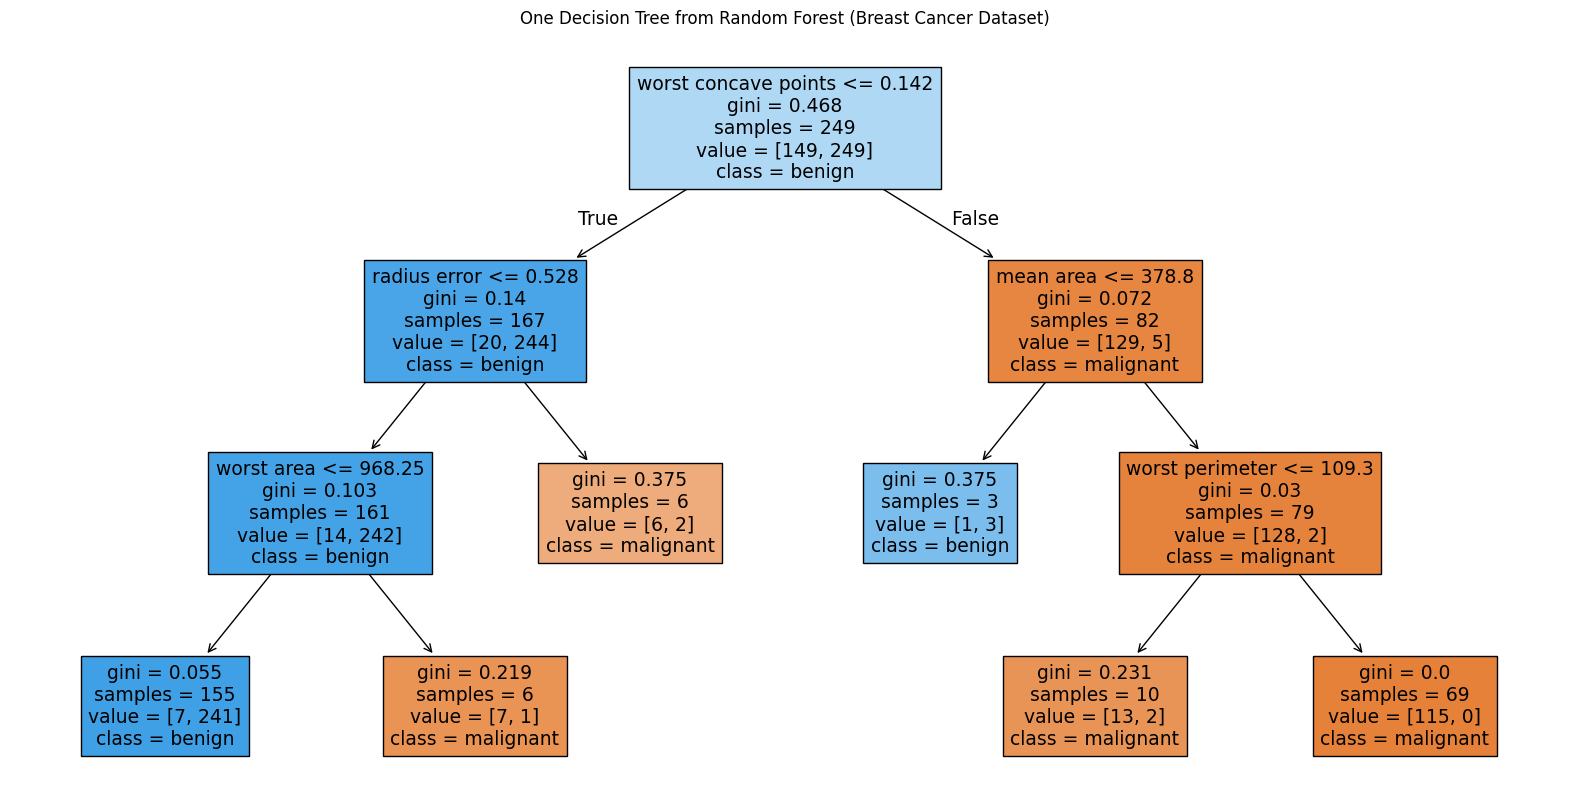

In [2]:

# 1. Import Required Libraries

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


# 2. Load Built-in Complex Dataset

data = load_breast_cancer()
X = data.data
y = data.target

print("Dataset shape:", X.shape)
print("Classes:", data.target_names)


# 3. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# 4. Random Forest Model (Controlled – No Overfitting)

rf = RandomForestClassifier(
    n_estimators=50,       # number of trees
    max_depth=3,           # limit depth
    min_samples_split=10,  # avoid memorization
    random_state=42
)

rf.fit(X_train, y_train)

# 5. Predictions

y_pred = rf.predict(X_test)

# 6. Evaluation Metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nAccuracy  :", accuracy)
print("Precision :", precision)
print("Recall    :", recall)
print("F1 Score  :", f1)

print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))


# 7. Visualize ONE Tree from Random Forest

plt.figure(figsize=(20, 10))
plot_tree(
    rf.estimators_[0],
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    max_depth=3
)
plt.title("One Decision Tree from Random Forest (Breast Cancer Dataset)")
plt.show()


In [14]:
# Take one patient from test data
patient = X_test[0].reshape(1, -1)

# Predict class
prediction = rf.predict(patient)

# Predict probability
proba = rf.predict_proba(patient)

# Result
if prediction[0] == 0:
    print("Prediction: Malignant (Cancer Detected)")
else:
    print("Prediction: Benign (No Cancer)")

print("Confidence:")
print("Cancer Probability   :", proba[0][0])
print("No Cancer Probability:", proba[0][1])






Prediction: Benign (No Cancer)
Confidence:
Cancer Probability   : 0.033185417452794956
No Cancer Probability: 0.9668145825472051
